<a href="https://colab.research.google.com/github/ctarrington/try-colab/blob/master/a_b_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from runpy import run_path

import numpy as np
from scipy.stats import beta, norm, rv_histogram

from matplotlib import pyplot as plt
from matplotlib.pyplot import plot, fill_between, vlines, hlines

In [2]:
!rm -rf try-colab
!git clone https://github.com/ctarrington/try-colab.git

rv_utils = run_path("/content/try-colab/myutils/rv_utils.py")
plot_ci = rv_utils.get('plot_ci')
print_ci = rv_utils.get('print_ci')
plot_distributions = rv_utils.get('plot_distributions')

Cloning into 'try-colab'...
remote: Enumerating objects: 152, done.
remote: Counting objects: 100% (152/152), done.
remote: Compressing objects: 100% (146/146), done.
remote: Total 152 (delta 74), reused 16 (delta 2), pack-reused 0
Receiving objects: 100% (152/152), 1.10 MiB | 16.87 MiB/s, done.
Resolving deltas: 100% (74/74), done.


## Comparison of two Betas, both with a prior of 30%


In [3]:
rv_prior = beta(3, 7)
rv_a = beta(36+3, 114+7)
rv_b = beta(50+3, 100+7)

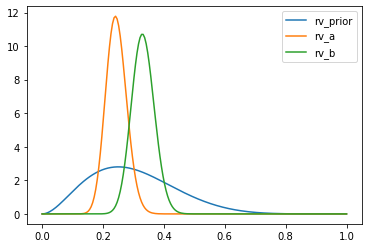

In [4]:
plot_distributions([rv_prior, rv_a, rv_b], ['rv_prior', 'rv_a', 'rv_b'])

## sample from each distribution to get a new distribution of $ \frac {b} {a} $

In [23]:
size = 200_000
b_over_a = [b_sample / a_sample for (b_sample, a_sample) in zip(rv_b.rvs(size), rv_a.rvs(size))]

(array([7.6000e+01, 1.3340e+03, 7.8000e+03, 2.2187e+04, 3.6531e+04,
        4.1817e+04, 3.6226e+04, 2.4869e+04, 1.4702e+04, 7.7540e+03,
        3.6440e+03, 1.7160e+03, 7.3800e+02, 3.6500e+02, 1.4900e+02,
        5.0000e+01, 2.5000e+01, 1.2000e+01, 2.0000e+00, 3.0000e+00]),
 array([0.62867047, 0.75608672, 0.88350296, 1.01091921, 1.13833546,
        1.2657517 , 1.39316795, 1.52058419, 1.64800044, 1.77541669,
        1.90283293, 2.03024918, 2.15766542, 2.28508167, 2.41249792,
        2.53991416, 2.66733041, 2.79474665, 2.9221629 , 3.04957915,
        3.17699539]),
 <a list of 20 Patch objects>)

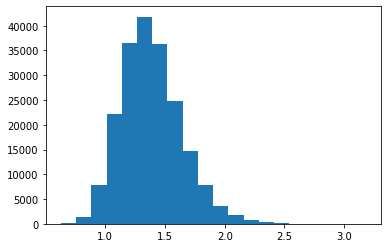

In [24]:
plt.hist(b_over_a, 20)

mean:  1.3866981331337271  median:  1.3629069698191911
leftCI 0.025000000000000022 rightCI 0.975
95.0  percent confidence interval 0.9625576657286035  to  1.9504430999952918
Probability  0.9625576657286035  <  b/a  <  1.9504430999952918  =  0.95


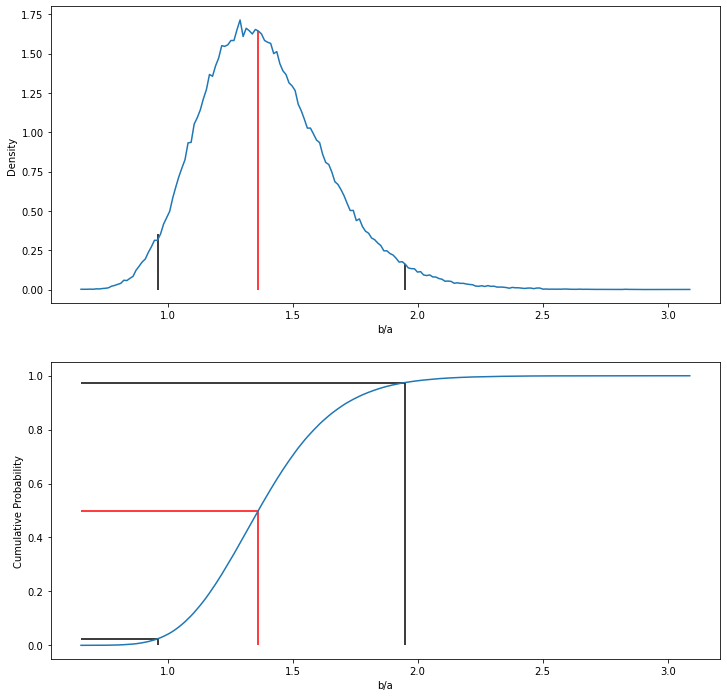

In [25]:
empirical_rv = rv_histogram(np.histogram(b_over_a, bins=200))
plot_ci(empirical_rv, 0.95, 'b/a')